# High Dimensional Data

For high-dimensional data, it is not possible to get a dense sampling of the data space. Consider the following analogy. Imagine we are measuring the temperatures of spaces with growing numbers of dimensions. We have sensors that measure reliably within a "volume" 1mm in extent. Outside of that volume, the temperature may change, so we need lots of sensors to map the temperature through the space. 
* 1D space: The total space is 1 m. You are given 100 sensors; each 1mm. The most you could fill up is 1/10th of the space
* 2D space: The total space is 1 m^2. You are given 100 sensors; each 1mm^2. The most you could fill up is 100mm^2 / (1000 mm)^2 = 1/10000th of the space. To cover 1/10th of the space, you would need 100,000 sensors!
* 3D space: The total space is 1 m^3. You are given 100 sensors; each 1mm^3. The most you could fill up is 100 mm^3 / (1000 mm)^3 = 1/10^7th of the space. To cover 1/10th of the space, you would need 100,000,000 sensors! 

You see where this is going. This is called THE CURSE OF DIMENSIONALITY.

In deep learning, we often work in data spaces with hundreds or thousands of dimensions, so... are we out of luck?

In [1]:
# libraries we will need
import torch
from torch import nn
import torch.optim as optim
import numpy as np
from torch.distributions import bernoulli
import matplotlib.pyplot as plt

# set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

<div class="admonition-main-idea admonition">
<p class="admonition-title">🔥 IMPORTANT CONCEPT 🔥</p>
<p> The CURSE OF DIMENSIONALITY refers to the fact that in high dimensional space, it is impossible to get dense coverage of the data space. </p>
</div>

In [2]:
from utils import create_answer_box
create_answer_box("Think back to the overfit regression model in the previous notebook. How might the curse of dimensionality make the overfitting problem worse? Why are deep neural networks especially problematic in this regard?", "04-01")

Think back to the overfit regression model in the previous notebook. How might the curse of dimensionality make the overfitting problem worse? Why are deep neural networks especially problematic in this regard?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

In [3]:
create_answer_box("How might THE CURSE OF DIMENSIONALITY pose a problem for real-world tasks like computer vision for autonomous driving?", "04-02")

How might THE CURSE OF DIMENSIONALITY pose a problem for real-world tasks like computer vision for autonomous driving?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

## Fake high-dimensional data

In [4]:
# set random seeds for reproducibility
torch.manual_seed(355)
np.random.seed(355)

In [5]:
# this dataset is a lot bigger, so we're going to switch over to gpu
# pytorch makes this easy
device = torch.device('cuda')

In [6]:
# make some non-linear, fake data
n_samples = 100_000
n_test = 20_000
n_dims = 1_000

w1 = torch.randn(n_dims, 128)
w2 = torch.randn(128)
b1 = torch.randn(128)
b2 = torch.randn(1)
noise = 1 * torch.randn(n_samples)

X = torch.randn(n_samples, n_dims)
y = torch.tanh(X @ w1 + b1) @ w2 + b2 + noise

# move to gpu:
X = X.to(device)
y = y.to(device)

X.shape, y.shape

(torch.Size([100000, 1000]), torch.Size([100000]))

## Splitting into train/test

In [7]:
# train/test split
X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

((torch.Size([80000, 1000]), torch.Size([80000])),
 (torch.Size([20000, 1000]), torch.Size([20000])))

## Fitting a model

In [8]:
# helper function for training/evaluation
def train_and_test_highdim(model, num_epochs=1000, reporting_interval=100):

    # create our optimizer object and tell it about the parameters in our model
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # how many times to update the model based on the available data
    epoch_ls = []
    train_losses = []
    test_losses = []
    for i in range(num_epochs):
        optimizer.zero_grad()

        y_hat = model(X_train).squeeze()
        loss = torch.mean((y_hat - y_train)**2)

        # update the model
        loss.backward() # gradient computation
        optimizer.step()  # weight updates

        if i % reporting_interval == 0:
            
            # Evaluate on test data
            # turn off gradient tracking for this step:
            with torch.no_grad():
                y_hat = model(X_test).squeeze()
                test_loss = torch.mean((y_hat - y_test)**2)
                
            print(f"Epoch {str(i+1).zfill(5)}", end='\r')
            
            epoch_ls.append(i)
            train_losses.append(loss.detach().item())
            test_losses.append(test_loss.item())
            
    plt.plot(epoch_ls, train_losses, label='train')
    plt.plot(epoch_ls, test_losses, label='test')
    plt.grid()
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')

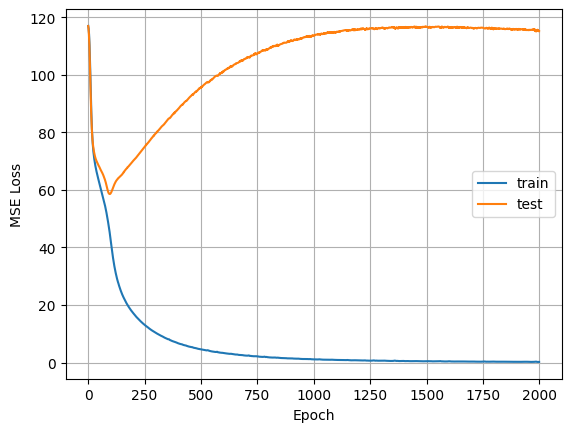

In [9]:
# This architecture is intentionally designed to overfit
model =  nn.Sequential(
    nn.Linear(in_features = n_dims, out_features = 128),
    nn.Tanh(),
    nn.Linear(128,128),
    nn.Tanh(),
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(64,50),
    nn.Tanh(),
    nn.Linear(50,1)
)

# move model to gpu:
model = model.to(device)

train_and_test_highdim(model, 2000, 1)

<div class="admonition-main-idea admonition">
<p class="admonition-title">Question</p>
<p> Why does the plot look like that? </p>
</div>

In [10]:
create_answer_box("Based on what you see in the plot, how could we avoid overfitting in this case?", "04-03")

Based on what you see in the plot, how could we avoid overfitting in this case?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

<div class="admonition-main-idea admonition">
<p class="admonition-title">😅 EXERCISE 😅</p>
<p> Using the code cell below, designed and test a biased model (which UNDERFITS rather than overfits). How do the training curves differ? </p>
</div>

In [ ]:
# model = your biased model goes here

# model = model.to(device)

# train_and_test_highdim(model, 2000, 1)

In [11]:
create_answer_box("Please describe the relationship between the train and test curves for your biased model. How does this compare to the previous model?", "04-04")

Please describe the relationship between the train and test curves for your biased model. How does this compare to the previous model?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

In [12]:
create_answer_box("Please copy/paste the code for your biased model here.", "04-05")

Please copy/paste the code for your biased model here.

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

## Summing up high dimensional data
* Overfitting problems become much worse for high-dimensional data due to the curse of dimensionality
* To test for overfitting, it is critical to evaluate your model on different data than you used to train your model
* Much of the technical progress in deep learning over the last decade can be viewed as better ways to prevent overfitting.

The significance of the challenge of overfitting for deep learning cannot be overstated!